In [1]:
import pandas as pd

### Read the csv file
Default separator is "," --> Need to specify the separator ";"

In [2]:
data = pd.read_csv("Adele_du_2020-12-01_au_2021-02-27.csv", sep = ";")

In [3]:
data.head()

,Date,Objet,Équipement,Commande,Type générique,Valeur,Unité
0,2020-12-01 14:30:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,"64,500000000",%
1,2020-12-01 15:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,"57,250000000",%
2,2020-12-01 16:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,"55,750000000",%
3,2020-12-01 17:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,"54,000000000",%
4,2020-12-01 18:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,"54,250000000",%


### Replace decimal marker
In France, the decimal marker is a comma --> Need to change to a dot.

In [4]:
data["Valeur"]

0        64,500000000
1        57,250000000
2        55,750000000
3        54,000000000
4        54,250000000
             ...     
14291               0
14292               0
14293               0
14294               0
14295               0
Name: Valeur, Length: 14296, dtype: object

In [5]:
data["Valeur"] = data["Valeur"].str.replace(',','.')

In [6]:
data.head()

,Date,Objet,Équipement,Commande,Type générique,Valeur,Unité
0,2020-12-01 14:30:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,64.500000000,%
1,2020-12-01 15:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,57.250000000,%
2,2020-12-01 16:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,55.750000000,%
3,2020-12-01 17:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,54.000000000,%
4,2020-12-01 18:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,54.250000000,%


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            14296 non-null  object
 1   Objet           14296 non-null  object
 2   Équipement      14296 non-null  object
 3   Commande        14296 non-null  object
 4   Type générique  14296 non-null  object
 5   Valeur          14296 non-null  object
 6   Unité           6540 non-null   object
dtypes: object(7)
memory usage: 781.9+ KB


### Convert data type from object to float
The **Valeur** column contains data we want to analyze but the data is an object. Only if the data is considered as floats or integers can these data be analyzed.

In [8]:
data["Valeur"] = data.Valeur.astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14296 non-null  object 
 1   Objet           14296 non-null  object 
 2   Équipement      14296 non-null  object 
 3   Commande        14296 non-null  object 
 4   Type générique  14296 non-null  object 
 5   Valeur          14296 non-null  float64
 6   Unité           6540 non-null   object 
dtypes: float64(1), object(6)
memory usage: 781.9+ KB


### Remove the columns we don't need
Columns **Objet**, **Equipement** and **Commande** are not useful for our analysis --> Remove them to simplify our work.

In [10]:
data.head()

,Date,Objet,Équipement,Commande,Type générique,Valeur,Unité
0,2020-12-01 14:30:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,64.50,%
1,2020-12-01 15:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,57.25,%
2,2020-12-01 16:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,55.75,%
3,2020-12-01 17:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,54.00,%
4,2020-12-01 18:00:00,Appartement,5MultiSensor 6 (ZW100),Humidité,HUMIDITY,54.25,%


In [11]:
data = data.drop(["Objet", "Équipement", "Commande"], 1)

In [12]:
data.head()

,Date,Type générique,Valeur,Unité
0,2020-12-01 14:30:00,HUMIDITY,64.50,%
1,2020-12-01 15:00:00,HUMIDITY,57.25,%
2,2020-12-01 16:00:00,HUMIDITY,55.75,%
3,2020-12-01 17:00:00,HUMIDITY,54.00,%
4,2020-12-01 18:00:00,HUMIDITY,54.25,%


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14296 non-null  object 
 1   Type générique  14296 non-null  object 
 2   Valeur          14296 non-null  float64
 3   Unité           6540 non-null   object 
dtypes: float64(1), object(3)
memory usage: 446.9+ KB


### Convert the Date into a Datetime stamp
This step will help in the calculations

In [14]:
data["Date"] = pd.to_datetime(data["Date"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            14296 non-null  datetime64[ns]
 1   Type générique  14296 non-null  object        
 2   Valeur          14296 non-null  float64       
 3   Unité           6540 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 446.9+ KB


In [16]:
data.head()

,Date,Type générique,Valeur,Unité
0,2020-12-01 14:30:00,HUMIDITY,64.50,%
1,2020-12-01 15:00:00,HUMIDITY,57.25,%
2,2020-12-01 16:00:00,HUMIDITY,55.75,%
3,2020-12-01 17:00:00,HUMIDITY,54.00,%
4,2020-12-01 18:00:00,HUMIDITY,54.25,%


### Change the names of the columns

In [17]:
data = data.rename(columns={"Type générique":"Type", "Valeur":"Value", "Unité":"Unit"})

In [18]:
data.head()

,Date,Type,Value,Unit
0,2020-12-01 14:30:00,HUMIDITY,64.50,%
1,2020-12-01 15:00:00,HUMIDITY,57.25,%
2,2020-12-01 16:00:00,HUMIDITY,55.75,%
3,2020-12-01 17:00:00,HUMIDITY,54.00,%
4,2020-12-01 18:00:00,HUMIDITY,54.25,%


### Select rows where type is PRESENCE

In [19]:
data_presence = data.loc[data["Type"] == "PRESENCE"]

In [20]:
data_presence

,Date,Type,Value,Unit
4360,2020-12-01 14:36:20,PRESENCE,0.0,NaN
4361,2020-12-01 14:49:20,PRESENCE,1.0,NaN
4362,2020-12-01 14:54:57,PRESENCE,0.0,NaN
4363,2020-12-01 14:59:10,PRESENCE,1.0,NaN
4364,2020-12-01 15:03:32,PRESENCE,0.0,NaN
...,...,...,...,...
9776,2021-02-27 13:14:08,PRESENCE,0.0,NaN
9777,2021-02-27 13:45:18,PRESENCE,1.0,NaN
9778,2021-02-27 13:50:39,PRESENCE,0.0,NaN
9779,2021-02-27 14:13:32,PRESENCE,1.0,NaN


In [21]:
data_presence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 4360 to 9780
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5421 non-null   datetime64[ns]
 1   Type    5421 non-null   object        
 2   Value   5421 non-null   float64       
 3   Unit    0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 211.8+ KB


### Remove values on Dec. 01

In [22]:
start_date = pd.to_datetime('2020-12-01 23:59:59')
data_presence = data_presence.loc[(data_presence['Date'] >= start_date)]
data_presence

,Date,Type,Value,Unit
4391,2020-12-02 02:04:55,PRESENCE,1.0,NaN
4392,2020-12-02 02:09:44,PRESENCE,0.0,NaN
4393,2020-12-02 06:15:31,PRESENCE,1.0,NaN
4394,2020-12-02 06:27:53,PRESENCE,0.0,NaN
4395,2020-12-02 06:33:01,PRESENCE,1.0,NaN
...,...,...,...,...
9776,2021-02-27 13:14:08,PRESENCE,0.0,NaN
9777,2021-02-27 13:45:18,PRESENCE,1.0,NaN
9778,2021-02-27 13:50:39,PRESENCE,0.0,NaN
9779,2021-02-27 14:13:32,PRESENCE,1.0,NaN


### Select the rows where presence is 1 for the first time in the day

In [23]:
start_date = pd.to_datetime("2020-12-02 00:00:00")
end_date = pd.to_datetime("2020-12-03 00:00:00")
last_date = pd.to_datetime("2021-02-27 00:00:00")
first_time = pd.DataFrame()
while end_date < last_date:
    select_start = data_presence[(data_presence["Date"] >= start_date)]
    select_end = select_start[(select_start["Date"] <= end_date)]
    start_date = start_date + pd.Timedelta(days=1)
    end_date = end_date + pd.Timedelta(days=1)
    if select_end.shape == (0, 4):
        continue
    if start_date == pd.to_datetime("2020-12-31 00:00:00"):
        continue
    else:
        top_row = select_end.iloc[0,]
        first_time = first_time.append(top_row)
first_time.to_csv("first_time.csv")

In [24]:
first_time

,Date,Type,Unit,Value
4391,2020-12-02 02:04:55,PRESENCE,NaN,1.0
4457,2020-12-03 05:32:59,PRESENCE,NaN,1.0
4511,2020-12-04 04:33:35,PRESENCE,NaN,1.0
4577,2020-12-05 08:01:38,PRESENCE,NaN,1.0
4651,2020-12-06 05:04:23,PRESENCE,NaN,1.0
...,...,...,...,...
9331,2021-02-21 05:14:32,PRESENCE,NaN,1.0
9381,2021-02-22 06:08:54,PRESENCE,NaN,1.0
9445,2021-02-23 05:55:09,PRESENCE,NaN,1.0
9513,2021-02-24 04:08:27,PRESENCE,NaN,1.0


In [25]:
#Create a new column called Time with only the time as object
first_time["Time"] = first_time["Date"].dt.time
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4391 to 9587
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    79 non-null     datetime64[ns]
 1   Type    79 non-null     object        
 2   Unit    0 non-null      float64       
 3   Value   79 non-null     float64       
 4   Time    79 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.7+ KB


### Figure out the average time we go to the kitchen for the 1st time in the day

In [26]:
time_only = pd.to_datetime(first_time["Time"], format='%H:%M:%S') - pd.to_datetime(first_time["Time"], format='%H:%M:%S').dt.normalize()
#Add the column "Time_only" into the first_time dataframe
first_time["Time_only"] = time_only
#Remove column "Time" into the first_time dataframe
first_time = first_time.drop(["Time"], 1)
#Rename the column "Time_only" into "Time"
first_time = first_time.rename(columns={"Time_only":"Time"})

In [27]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4391 to 9587
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Date    79 non-null     datetime64[ns] 
 1   Type    79 non-null     object         
 2   Unit    0 non-null      float64        
 3   Value   79 non-null     float64        
 4   Time    79 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), object(1), timedelta64[ns](1)
memory usage: 3.7+ KB


In [28]:
time_only.describe()

count                           79
mean     0 days 04:58:28.329113924
std      0 days 01:14:03.755286257
min                0 days 00:08:44
25%                0 days 04:36:36
50%                0 days 05:12:59
75%         0 days 05:41:14.500000
max                0 days 08:01:38
Name: Time, dtype: object

In [29]:
first_time["Day"] = first_time["Date"].dt.date
first_time["time"] = first_time["Date"].dt.time
first_time

,Date,Type,Unit,Value,Time,Day,time
4391,2020-12-02 02:04:55,PRESENCE,NaN,1.0,0 days 02:04:55,2020-12-02,02:04:55
4457,2020-12-03 05:32:59,PRESENCE,NaN,1.0,0 days 05:32:59,2020-12-03,05:32:59
4511,2020-12-04 04:33:35,PRESENCE,NaN,1.0,0 days 04:33:35,2020-12-04,04:33:35
4577,2020-12-05 08:01:38,PRESENCE,NaN,1.0,0 days 08:01:38,2020-12-05,08:01:38
4651,2020-12-06 05:04:23,PRESENCE,NaN,1.0,0 days 05:04:23,2020-12-06,05:04:23
...,...,...,...,...,...,...,...
9331,2021-02-21 05:14:32,PRESENCE,NaN,1.0,0 days 05:14:32,2021-02-21,05:14:32
9381,2021-02-22 06:08:54,PRESENCE,NaN,1.0,0 days 06:08:54,2021-02-22,06:08:54
9445,2021-02-23 05:55:09,PRESENCE,NaN,1.0,0 days 05:55:09,2021-02-23,05:55:09
9513,2021-02-24 04:08:27,PRESENCE,NaN,1.0,0 days 04:08:27,2021-02-24,04:08:27


<AxesSubplot:xlabel='Day'>

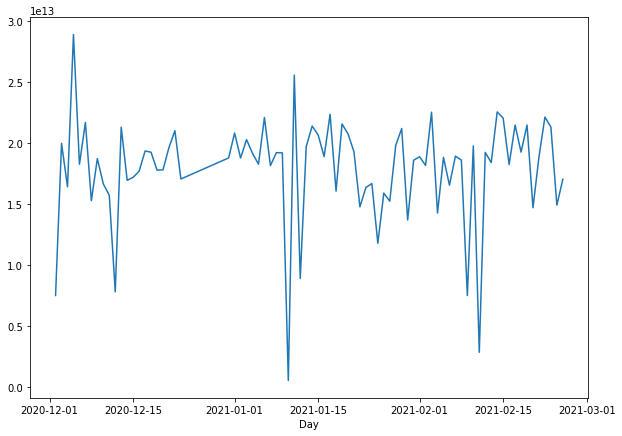

In [46]:
first_time.plot.line(x = "Day", y = "Time", legend = False, figsize = (10,7))

<AxesSubplot:ylabel='Frequency'>

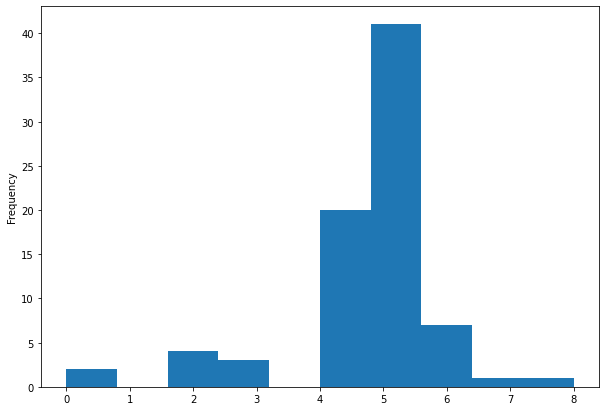

In [43]:
first_time['Time'].astype('timedelta64[h]').plot.hist(x = "Day", figsize = (10,7))

<AxesSubplot:>

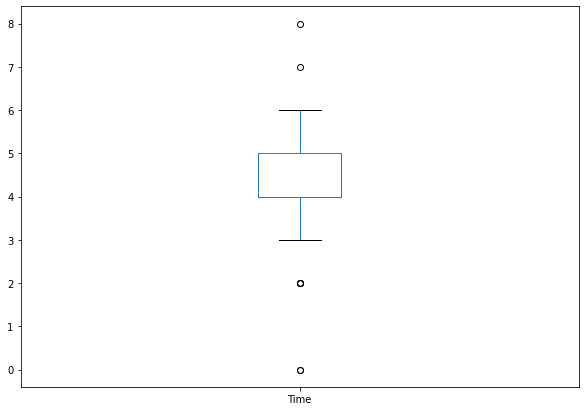

In [44]:
first_time['Time'].astype('timedelta64[h]').plot.box(x = "Day", figsize = (10, 7))

<AxesSubplot:>

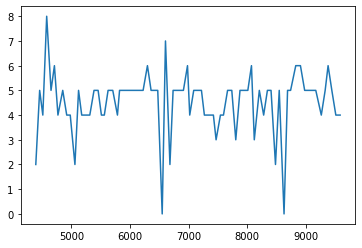

In [45]:
first_time['Time'].astype('timedelta64[h]').plot(x = "Day")